In [1]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def display(img,cmap='gray'):
    fig=plt.figure(figsize=(12,10))
    ax=fig.add_subplot(111)
    ax.imshow(img,cmap='gray')
    

In [3]:
reeses=cv2.imread('reeses_puffs.png',0)

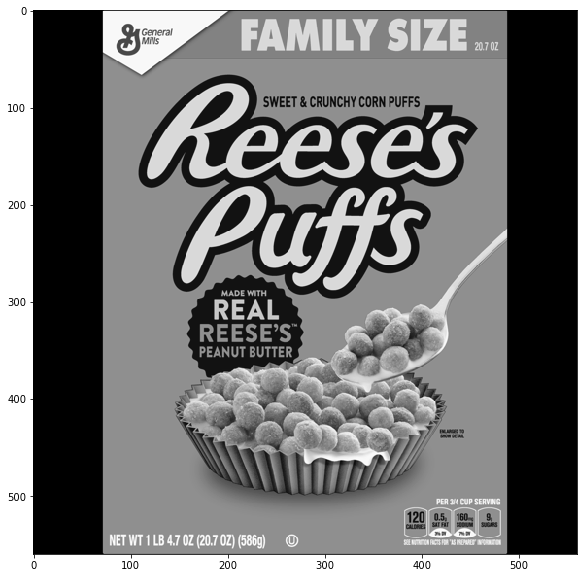

In [4]:
display(reeses)

In [5]:
cereals=cv2.imread("many_cereals.jpg",0)


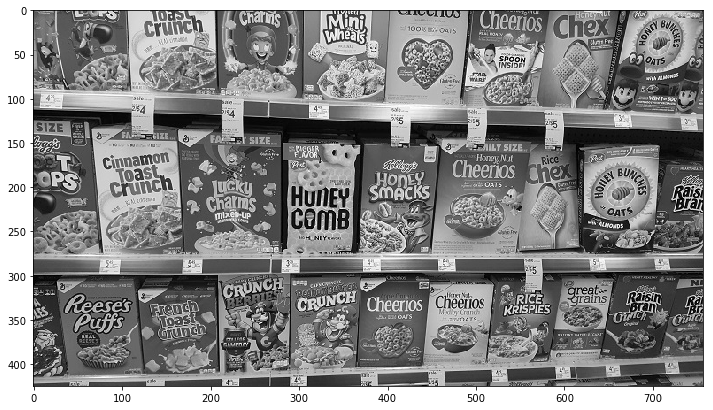

In [6]:
display(cereals)

Brute Force Detection with ORB Descriptors

In [7]:
#Intiliaze ORB detector
orb=cv2.ORB_create()
#This line initializes the ORB (oriented FAST andd Rotated BRIEF)detector,
#which is a feature detector and descriptor extractor

#Find the key points and descriptors with ORB
kp1,des1=orb.detectAndCompute(reeses,None)
kp2,des2=orb.detectAndCompute(cereals,None)

#orb.detectANDCompute() finds the keypoints (distinctive image feature)
#and computes their descriptors (a vector representing the keypoint in a high)
#kp1 and kp2 are lists of keypoints found  in the reeses and cereals images respectivly
#des1 and des2 are the corresponding descriptors for these keypoints

#create BFmatcher object
bf=cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck=True)
#cv2.BFMatcher is the brute force matcher object
#wghich is used to match descriptors of between two images
#cv2.NORM_HAMMING specifies that the Hamming distance
#should be used to campare decriptors (appropriate for ORB).
#crooscheck=True ensures that the matches are symmetric
#meaning that if a descriptors ib reeses matches a descriptor in cereals,
#the reverse should also be true

#match descriptors
matches=bf.match(des1,des2)
#this line matches the descriptors from the two images
#each match object containts information about the matching keypoints from the images
#sort them in order of there distance
matches=sorted(matches,key=lambda x:x.distance)
#trhe matches are sorted based on trhe distance between the descriptors
#shorter distances indicate better matches


#Draw first 25 matches
reeses_matches=cv2.drawMatches(reeses,kp1,cereals,kp2,matches[:25],None,flags=2)
#cv2.drawMatches visualizes the first 25 matches by drawing lines between the 
#matches=d keypints in two images
#the result is stored inthe reeses_matches variable

#flags=2 is used to draw matches without keypoints

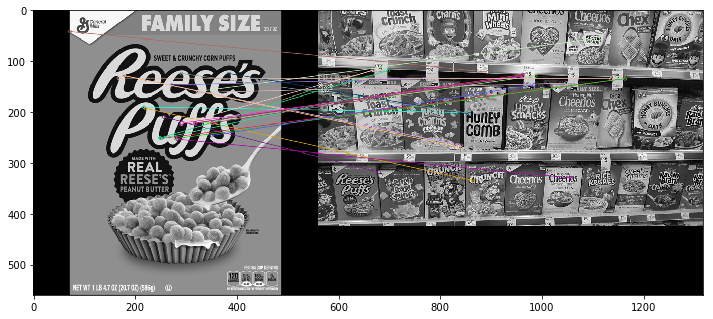

In [8]:
display(reeses_matches)

--------------------------------------------------------------------------------------------------------------------------------
_____________________________________________________________________________________________________________________________

Brute Force Matching with SIFT Descriptors and Ratio Test SIFT (Scale-Inverient Feature Transform)
algorithm to detect and match features between two images (reeses and cereals)

In [11]:
#create SIFT object
sift=cv2.xfeatures2d.SIFT_create()
#This line initializes the SIFT detector
#Which is used for detecting keypoints and computing descriptors
#SIFT is known for its robustness to change in scale,rotation illunmanate
###################################################################3
#find the keypoint descriptor with sift
kp1,des1=sift.detectAndCompute(reeses,None)
kp2,des2=sift.detectAndCompute(cereals,None)
#sift.detectAndCompute() detect keypints and compute their
#corresponding descriptors for the two images.
#kp1,kp2 are the keypoints detected in reeses and cereals
#des1 and des 2 are the descriptors associated with these keypoints

#BFMatcher with default params
bf=cv2.BFMatcher()
#This line creates a Brute force matcher object with default parameters
#the Bfmatcher matches descriptors between the two images by finding the closese
matches=bf.knnMatch(des1,des2,k=2)
#bf.knnMatch( ) finds the two best matches for each descroiptors in des1
#(from reeses) by comparing them with all the descriptors in des2(from cereals)
#the k=2 parameter means that 


#Apply ratio test
good=[]
for match1,match2 in matches :
    if match1.distance<0.75*match2.distance:
        good.append([match1])
        
#the ratio test is used to filter out poor images
#It compares the distance of the closest match(match1) to the distance to the distance of second closest match(match2)
#If the distance of the match1< 0.75 times the distance of match2.
#the match is considered good and added to the good list
#TRhe ratio test helps to eliminate false matches ensuring that 
#the closest match is significantly better thyan the second closest


#cv2.drawMatchesKnn
sift_matches=cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,good,None,flags=2)



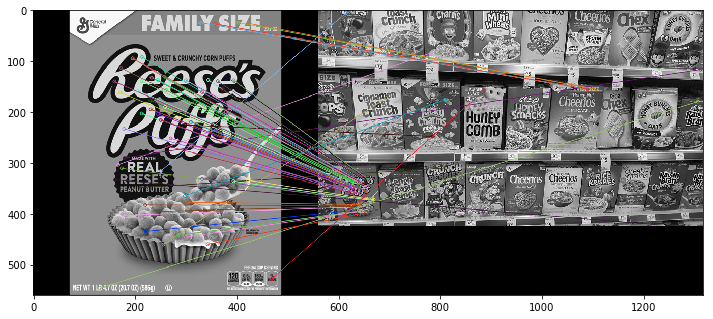

In [12]:
display(sift_matches)

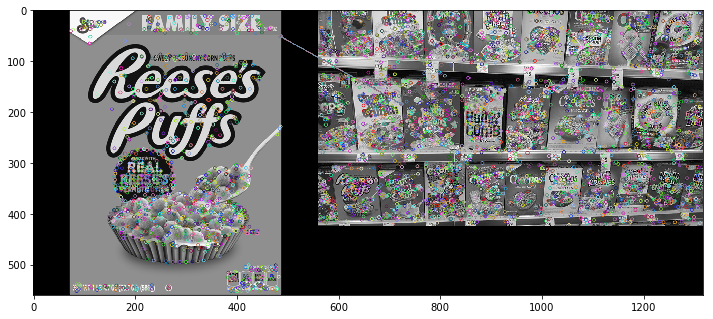

In [13]:
#create SIFT object
sift=cv2.xfeatures2d.SIFT_create()

#find the keypoint descriptor with sift
kp1,des1=sift.detectAndCompute(reeses,None)
kp2,des2=sift.detectAndCompute(cereals,None)

#FLANN parameters
FLANN_INDEX_KDTREE=0
index_params=dict(algorithm=FLANN_INDEX_KDTREE,trees=5)
search_params=dict(checks=50)

flann=cv2.FlannBasedMatcher(index_params,search_params)

matches=flann.knnMatch(des1,des2,k=2)

good=[]

for i,(match,match2) in enumerate (matches):
    if match1.distance < 0.7 *match2.distance:
        
        good.append([match1])
        
flann_matches=cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,good,None,flags=0)

display(flann_matches)



In [14]:
import cv2

# Create SIFT detector object
sift = cv2.xfeatures2d.SIFT_create()
# Initializes the SIFT detector for detecting keypoints and computing descriptors.
# SIFT is robust to changes in scale, rotation, and illumination.

# Find the keypoints and descriptors with SIFT for both images
kp1, des1 = sift.detectAndCompute(reeses, None)
kp2, des2 = sift.detectAndCompute(cereals, None)
# kp1, kp2 are keypoints detected in the 'reeses' and 'cereals' images.
# des1, des2 are the descriptors associated with these keypoints.


#FLANN paramteres
FLANN_INDEX_KDTREE=0
index_params=dict(algorithm= FLANN_INDEX_KDTREE,trees=5)
search_params= dict(checks=50)
flann= cv2.FlannBasedMatcher(index_params,search_params)

matches=flann.knnMatch(des1,des2,k=2)

# Apply the ratio test to filter out poor matches
good = []
for match1, match2 in matches:
    if match1.distance < 0.7 * match2.distance:
        good.append([match1])
# The ratio test helps filter out false matches.
# It compares the distance of the closest match (match1) to the distance of the second closest match (match2).
# If the distance of match1 is less than 0.75 times the distance of match2,
# the match is considered good and is added to the 'good' list.

# Draw the matches using cv2.drawMatchesKnn, which expects a list of lists as matches
flan_matches = cv2.drawMatchesKnn(reeses, kp1, cereals, kp2, good, None, flags=2)
# cv2.drawMatchesKnn draws the matches between the keypoints of the two images.

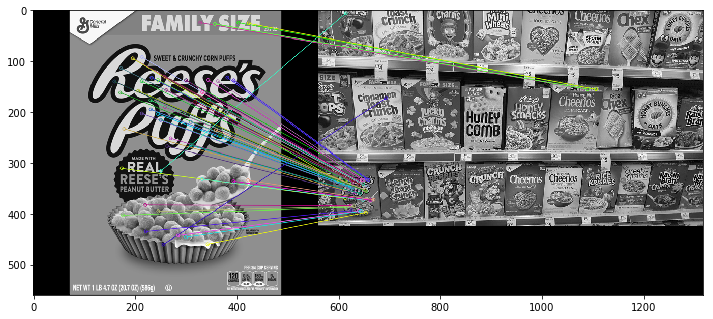

In [15]:
display(flan_matches)